In [2]:
library(ISLR)
library(MASS)
library(class)
library(ISLR)
library(MASS)
library(data.table) 
library(ggplot2)
library(dplyr)
library(e1071)
library(rpart)
library(caret)
library(tidyverse)
library(ggplot2)
library(stringr)

Warning message:
"package 'ISLR' was built under R version 3.4.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:data.table':

    between, first, last

The following object is masked from 'package:MASS':

    select

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'e1071' was built under R version 3.4.3"Loading required package: lattice
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Conflicts with tidy packages ---------------------------------------------------
between():   dplyr, data.table
filter():    dplyr, stats
first():     dplyr, data.table
lag():       dplyr, stats
last():      dplyr, data.table
lift():      purrr, caret
select():    dplyr, MASS
transpose(): purrr, data.table


In [3]:
colorstats <- read.csv('Stats.csv')
colorstats %>%
  select(Percentage.Black, Percentage.White, Percentage.Blue, Percentage.Red, Percentage.Yellow,
         Percentage.Green, Percentage.Purple, People, Percentage.Cyan, Number.of.Likes) ->stat
stat %>%
    filter(Number.of.Likes <=100) -> stat1

stat1 %>%
    select(Percentage.Black, Percentage.White, Percentage.Blue, Percentage.Red, Percentage.Yellow,
         Percentage.Green, Percentage.Purple, Percentage.Cyan) ->sorted
cbind(sorted, t(apply(sorted, 1, sort, decreasing = TRUE))) -> sorted1
colnames(sorted1) <- c("Percentage.Black", "Percentage.White", "Percentage.Blue", "Percentage.Red", "Percentage.Yellow",
                     "Percentage.Green","Percentage.Purple","Percentage.Cyan", "Color1", "Color2", "Color3",
                     "Color4", "Color5", "Color6", "Color7", "Color8")
sorted1 %>%
 select(Color1, Color2, Color3, Color4, Color5, Color6, Color7, Color8) ->domcolor
dompcolor <- domcolor
domcolor$Likes <- stat1$Number.of.Likes
dompcolor$People <- stat1$People

In [8]:
glm.fit=glm(Likes~.,data=domcolor)
coef(glm.fit)

(Intercept)      Color1      Color2      Color3      Color4      Color5 
   626194.7   -626172.8   -626174.8   -626155.5   -626227.0   -626127.0 
     Color6      Color7      Color8 
  -626131.1   -626053.7   -626178.7

In [9]:
boot.fn=function(data,index)
    return(coef(lm(Likes~.,data=data,subset=index)))
boot.fn(domcolor,1:900)

(Intercept)      Color1      Color2      Color3      Color4      Color5 
   584001.8   -583979.9   -583981.2   -583964.6   -584038.1   -583923.7 
     Color6      Color7      Color8 
  -583940.4   -583850.3   -583991.3

In [10]:
library(boot)
boot(domcolor,boot.fn,10000)


Attaching package: 'boot'

The following object is masked from 'package:survival':

    aml

The following object is masked from 'package:lattice':

    melanoma




ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = domcolor, statistic = boot.fn, R = 10000)


Bootstrap Statistics :
     original    bias    std. error
t1*  626194.7 -2938.848    689976.1
t2* -626172.8  2938.843    689976.3
t3* -626174.8  2938.852    689975.2
t4* -626155.5  2938.923    689975.7
t5* -626227.0  2938.518    689977.5
t6* -626127.0  2940.110    689981.9
t7* -626131.1  2942.378    689967.7
t8* -626053.7  2928.765    689948.7
t9* -626178.7  2930.440    690017.4

In [11]:
boot.fn=function(data,index)
    coefficients(lm(Likes~Color1+I(Color2^2)+I(Color3^3)+I(Color4^4)+I(Color5^5)+I(Color6^6)+I(Color7^7)+I(Color8^8),
                    data=data,subset=index))
set.seed(1)
boot(domcolor,boot.fn,10000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = domcolor, statistic = boot.fn, R = 10000)


Bootstrap Statistics :
         original        bias     std. error
t1*  1.698600e+01 -1.209492e+00 5.969350e+00
t2*  6.000427e+00  1.380935e+00 7.210681e+00
t3*  7.727578e+00  3.636233e+00 1.923102e+01
t4*  3.589304e+02  1.933176e+01 2.990992e+02
t5* -4.550786e+03  2.612312e+02 4.306417e+03
t6*  2.411952e+05 -4.258051e+04 5.008095e+05
t7* -7.450644e+07  5.526763e+08 1.069346e+09
t8*  8.082718e+10  1.796439e+11 6.462782e+11
t9*  1.659312e+14  1.423827e+15 6.723586e+15

In [12]:
summary(lm(Likes~Color1+I(Color2^2)+I(Color3^3)+I(Color4^4)+I(Color5^5)+I(Color6^6)+I(Color7^7)+I(Color8^8),
           data=domcolor))$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),1.698600e+01,5.442872e+00,3.1207798,0.001858963
Color1,6.000427e+00,6.576454e+00,0.9124108,0.361787195
I(Color2^2),7.727578e+00,1.939085e+01,0.3985167,0.690340154
I(Color3^3),3.589304e+02,2.207030e+02,1.6263046,0.104221122
I(Color4^4),-4.550786e+03,4.140720e+03,-1.0990325,0.272036208
I(Color5^5),2.411952e+05,3.169193e+05,0.7610619,0.446811573
I(Color6^6),-7.450644e+07,1.102835e+08,-0.6755903,0.499467507
I(Color7^7),8.082718e+10,2.792339e+11,0.2894605,0.772293012
I(Color8^8),1.659312e+14,3.430206e+14,0.4837354,0.628686720


In [13]:
#tree
library(MASS)


library(ISLR)
set.seed(20)
train=sample(1:nrow(domcolor),nrow(domcolor)/2)
dc.train=domcolor[train,]
dc.test=domcolor[-train,]

library(tree)

tree.dc=tree(Likes~.,data=dc.train, subset=train)
summary(tree.dc)

Warning message:
"package 'tree' was built under R version 3.4.3"


Regression tree:
tree(formula = Likes ~ ., data = dc.train, subset = train)
Variables actually used in tree construction:
[1] "Color1" "Color6" "Color5" "Color7" "Color4" "Color8" "Color3"
Number of terminal nodes:  15 
Residual mean deviance:  233.4 = 51820 / 222 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-54.5000  -8.8590  -0.8592   0.0000   5.4590  76.1400 

In [14]:
tree.dc

node), split, n, deviance, yval
      * denotes terminal node

  1) root 237 84130.0 22.58  
    2) Color1 < 0.601166 120 27580.0 19.42  
      4) Color1 < 0.38953 29 10340.0 27.03  
        8) Color6 < 0.0013485 6   352.0 11.00 *
        9) Color6 > 0.0013485 23  8046.0 31.22  
         18) Color5 < 0.0086115 6  3225.0 46.67 *
         19) Color5 > 0.0086115 17  2883.0 25.76 *
      5) Color1 > 0.38953 91 15020.0 17.00  
       10) Color7 < 0.000147 20   918.8 10.40 *
       11) Color7 > 0.000147 71 12980.0 18.86 *
    3) Color1 > 0.601166 117 54130.0 25.82  
      6) Color5 < 0.016381 89 29180.0 21.99  
       12) Color4 < 0.007383 23 13370.0 29.09  
         24) Color5 < 0.0037865 16  3112.0 20.50 *
         25) Color5 > 0.0037865 7  6383.0 48.71 *
       13) Color4 > 0.007383 66 14240.0 19.52  
         26) Color6 < 3.35e-005 6  4195.0 35.83 *
         27) Color6 > 3.35e-005 60  8290.0 17.88  
           54) Color8 < 0.000267 37  3111.0 14.54 *
           55) Color8 > 0.000267 23  

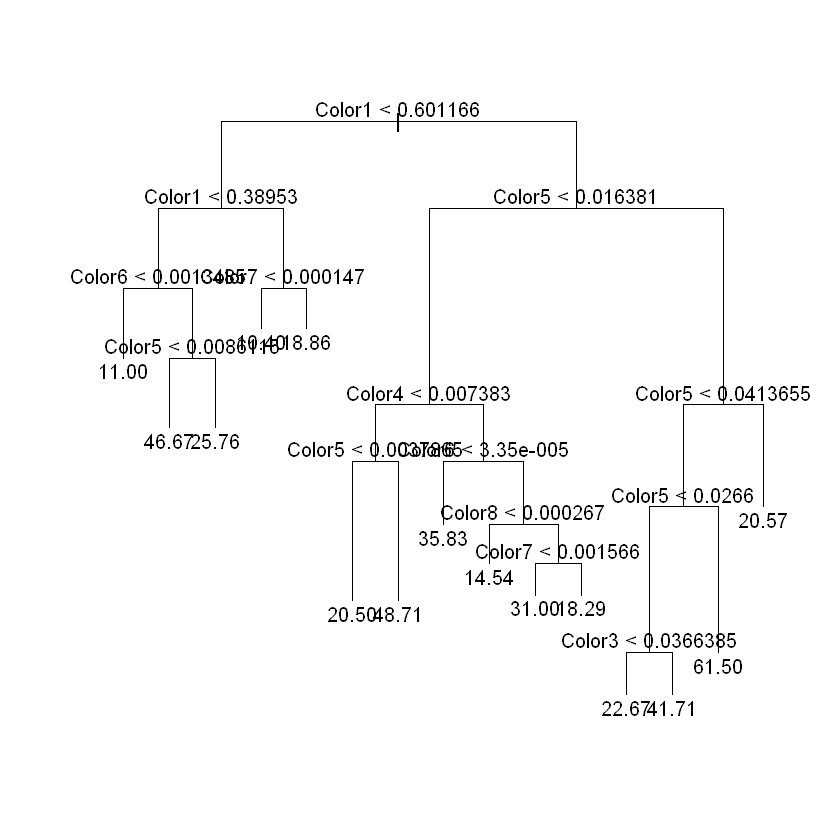

In [15]:
plot(tree.dc)
text(tree.dc, pretty = 0)

In [16]:
tree.pred =predict(tree.dc, dc.test)
table(tree.pred,dc.test$Likes)



TE = table(tree.pred, dc.test$Likes)
(TE[1, 2] + TE[2, 1])/sum(TE)

                  
tree.pred          1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  10.4             0 3 2 2 2 1 2 1 1  1  1  1  1  1  0  0  0  2  0  3  1  0  1
  11               0 0 0 0 0 0 0 0 0  0  0  0  0  0  0  0  0  1  0  1  0  1  1
  14.5405405405405 2 5 1 3 3 2 1 0 4  3  0  3  5  4  0  4  5  4  5  4  1  3  6
  18.2857142857143 1 1 0 1 0 0 0 0 0  0  0  1  0  1  0  1  1  1  0  1  1  0  1
  18.8591549295775 2 9 0 6 5 1 2 1 1  0  2  5  4  3  3  3  4  4  3  5  4  2  9
  20.5             0 2 3 1 1 1 0 0 2  0  3  1  1  0  1  0  0  1  1  2  2  3  1
  20.5714285714286 0 0 0 0 0 1 0 0 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  22.6666666666667 0 0 0 0 1 0 0 0 0  0  0  0  0  1  0  0  0  0  0  0  0  0  1
  25.7647058823529 1 0 1 0 1 0 0 1 0  0  0  0  0  1  0  1  2  0  1  2  0  1  0
  31               0 1 0 0 1 0 0 0 0  0  1  0  0  0  0  0  0  0  1  1  2  0  0
  35.8333333333333 1 0 0 0 1 1 0 0 3  1  1  0  0  4  0  2  0  1  5  1  0  2  0
  41.7142857142857 0 0 0 0 2 2 0 

[1] 0.006342495

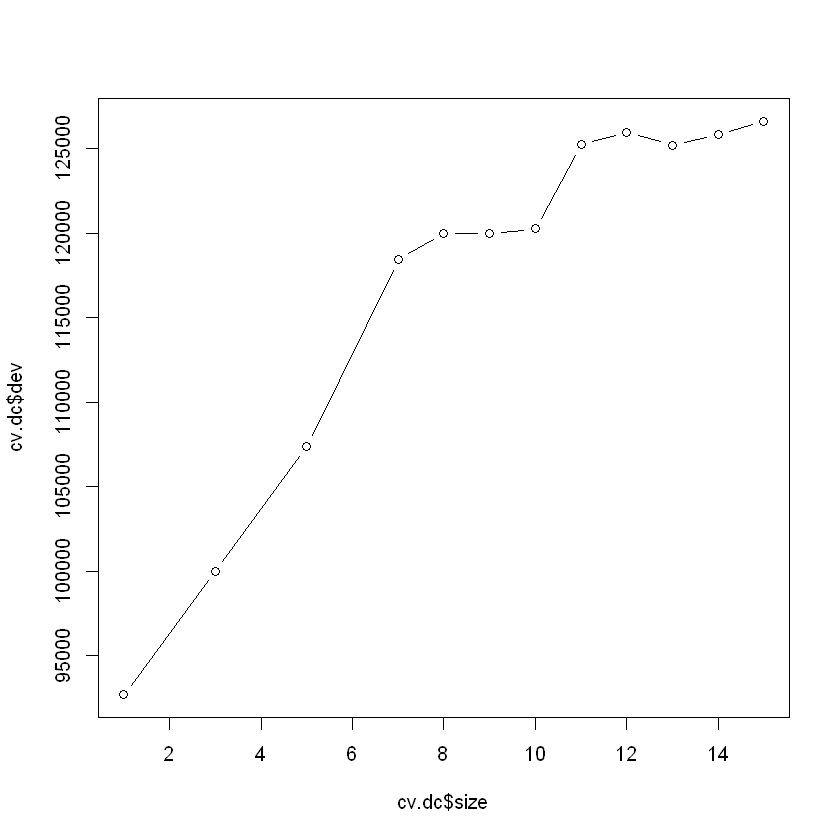

In [17]:
cv.dc =cv.tree(tree.dc)
plot(cv.dc$size ,cv.dc$dev ,type="b")

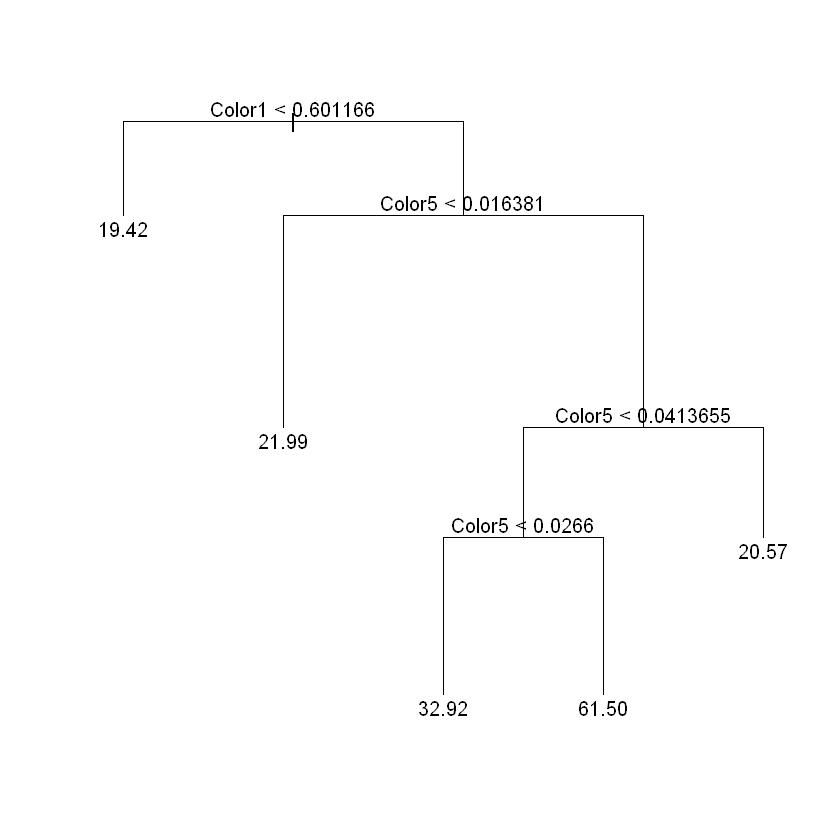

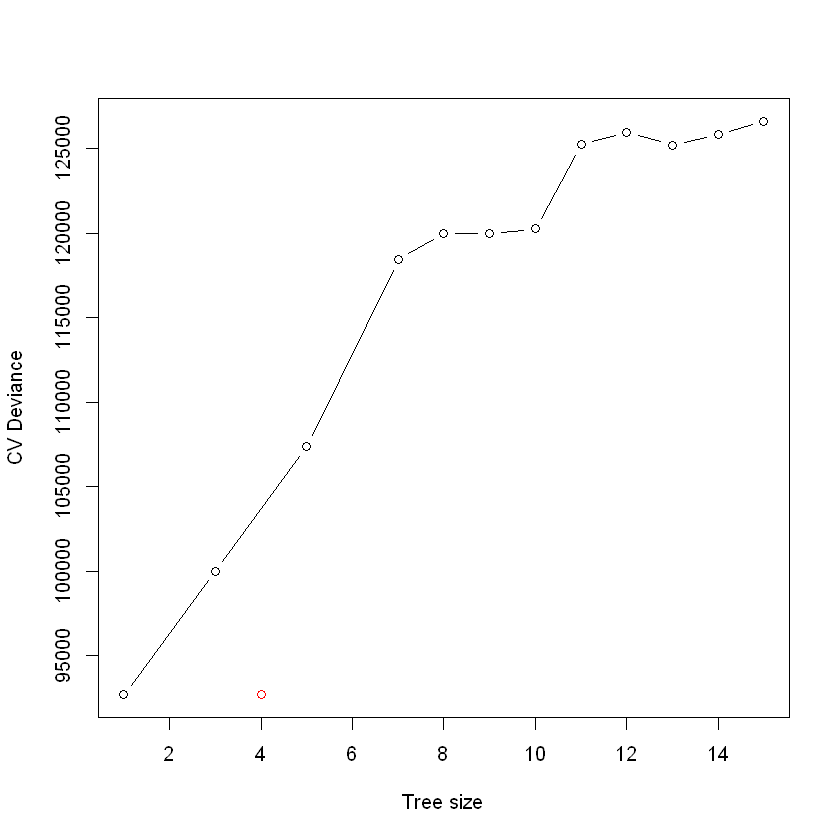

In [18]:
prune.dc =prune.tree(tree.dc,best =4)
plot(prune.dc )
text(prune.dc,pretty =0)
plot(cv.dc$size,cv.dc$dev,xlab="Tree size",ylab="CV Deviance",type = "b")
points(4,min(cv.dc$dev),col="red")


[1] 327.8027

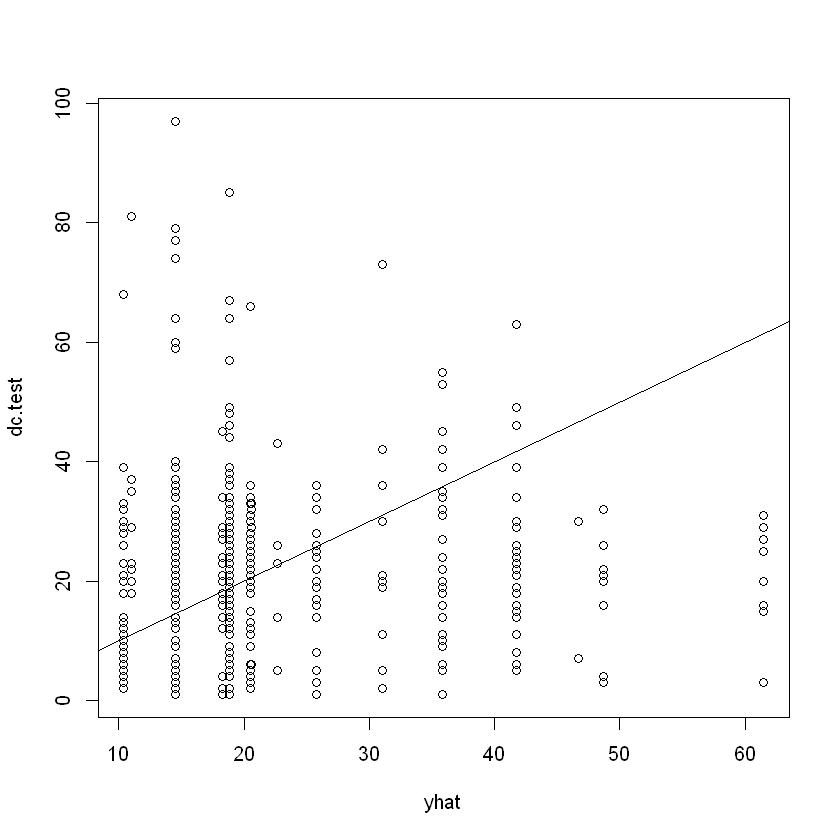

In [19]:
yhat=predict(tree.dc,newdata=domcolor[-train ,])
dc.test=domcolor[-train ,"Likes"]
plot(yhat,dc.test)
abline (0,1)
mean((yhat-dc.test)^2)

In [20]:
library (randomForest)
set.seed (1)
bag.dc =randomForest(Likes∼.,data=domcolor,subset=train ,mtry=8, importance=TRUE)
bag.dc

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:dplyr':

    combine

The following object is masked from 'package:ggplot2':

    margin




Call:
 randomForest(formula = Likes ~ ., data = domcolor, mtry = 8,      importance = TRUE, subset = train) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 8

          Mean of squared residuals: 334.7457
                    % Var explained: -11.22

[1] 233.2712

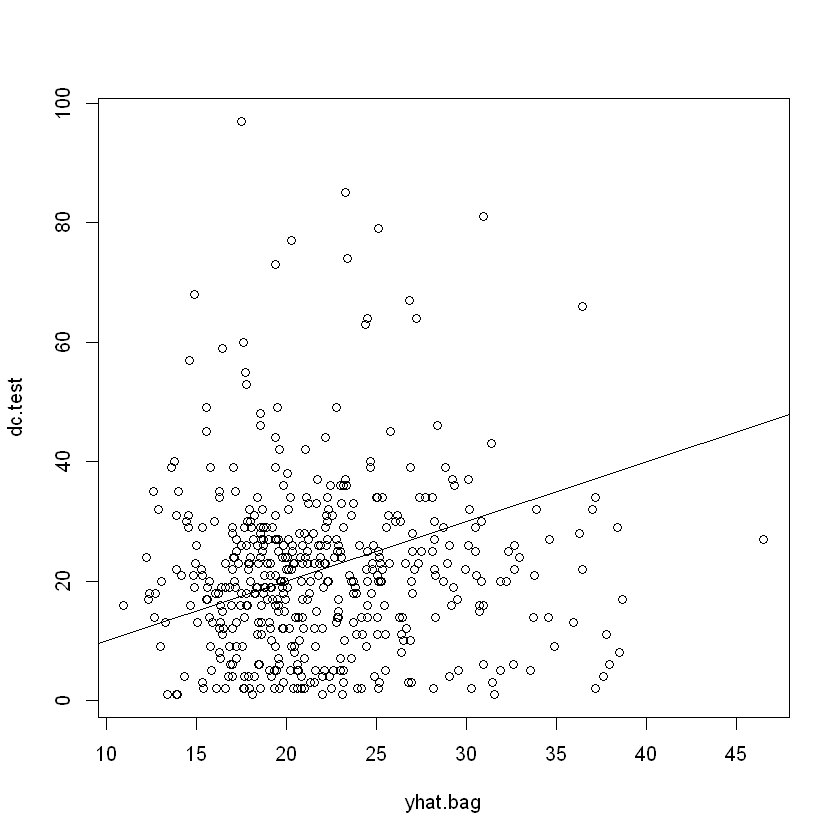

In [21]:
yhat.bag = predict(bag.dc,newdata=domcolor[-train ,])
plot(yhat.bag, dc.test)
abline (0,1)
mean((yhat.bag -dc.test)^2)

In [22]:
bag.dc =randomForest(Likes∼.,data=domcolor,subset =train ,mtry=13, ntree =25)
yhat.bag = predict(bag.dc,newdata =domcolor[-train ,])
mean((yhat.bag-dc.test)^2)

Warning message in randomForest.default(m, y, ...):
"invalid mtry: reset to within valid range"

[1] 242.4085

In [23]:
set.seed (1)
rf.dc =randomForest(Likes∼.,data=domcolor,subset=train,mtry=6, importance =TRUE)
yhat.rf= predict(rf.dc ,newdata =domcolor [-train ,])
mean((yhat.rf -dc.test)^2)

[1] 232.2959

In [24]:
importance(rf.dc)

,%IncMSE,IncNodePurity
Color1,14.360160,17835.325
Color2,10.720262,15497.046
Color3,11.685574,18919.867
Color4,12.698435,20340.347
Color5,16.293317,19698.706
Color6,11.771296,14566.642
Color7,10.905228,13617.939
Color8,8.716156,9065.871


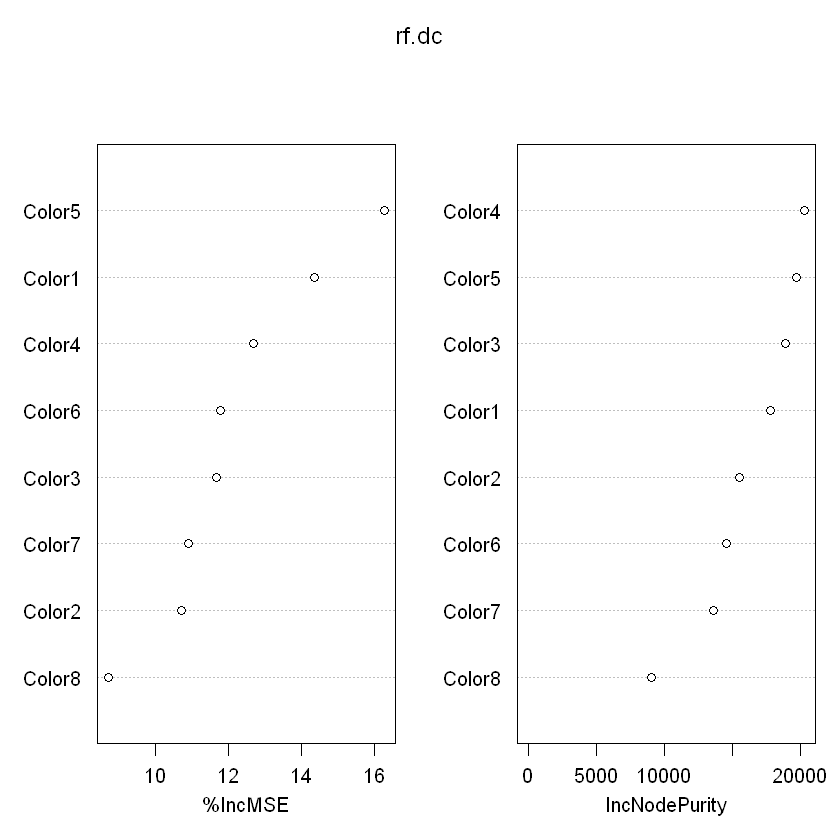

In [25]:
varImpPlot(rf.dc)

In [26]:
library (gbm)
set.seed (1)
train=sample(1:nrow(domcolor),nrow(domcolor)/2)
boost.dc =gbm(Likes∼.,data=domcolor[train ,], distribution="gaussian",n.trees=5000, interaction.depth =4)

In [27]:

plot(boost.dc,i="rm")
plot(boost.dc,i="lstat")

ERROR: Error in plot.gbm(boost.dc, i = "rm"): Plot variables not used in gbm model fit: rm


In [28]:
yhat.boost=predict(boost.dc,newdata =domcolor[-train ,],n.trees =5000)
mean((yhat.boost -dc.test)^2)

[1] 225.0241

In [31]:
boost.dc=gbm(Likes∼.,data=domcolor[train ,], distribution="gaussian",n.trees=5000,interaction.depth =4,shrinkage =0.2,verbose=F)
yhat.boost=predict(boost.dc ,newdata =domcolor[-train ,],n.trees =5000)
mean((yhat.boost -dc.test)^2)

[1] 314.6639

In [32]:
library (gam) 
gam.m3=gam(Likes∼s(Color1,1)+s(Color5,5)+s(Color2,2)+s(Color3,3)+s(Color4,4),data=domcolor)
anova(gam.m3,test="F") 

Warning message:
"package 'gam' was built under R version 3.4.4"Loading required package: foreach

Attaching package: 'foreach'

The following objects are masked from 'package:purrr':

    accumulate, when

Loaded gam 1.15



,Npar Df,Npar F,Pr(F)
(Intercept),NA,NA,NA
"s(Color1, 1)",0,0.9916303,6.405046e-05
"s(Color5, 5)",4,0.5933463,6.675174e-01
"s(Color2, 2)",1,0.1881536,6.645681e-01
"s(Color3, 3)",2,4.9807950,7.051430e-03
"s(Color4, 4)",3,0.7493380,5.228559e-01


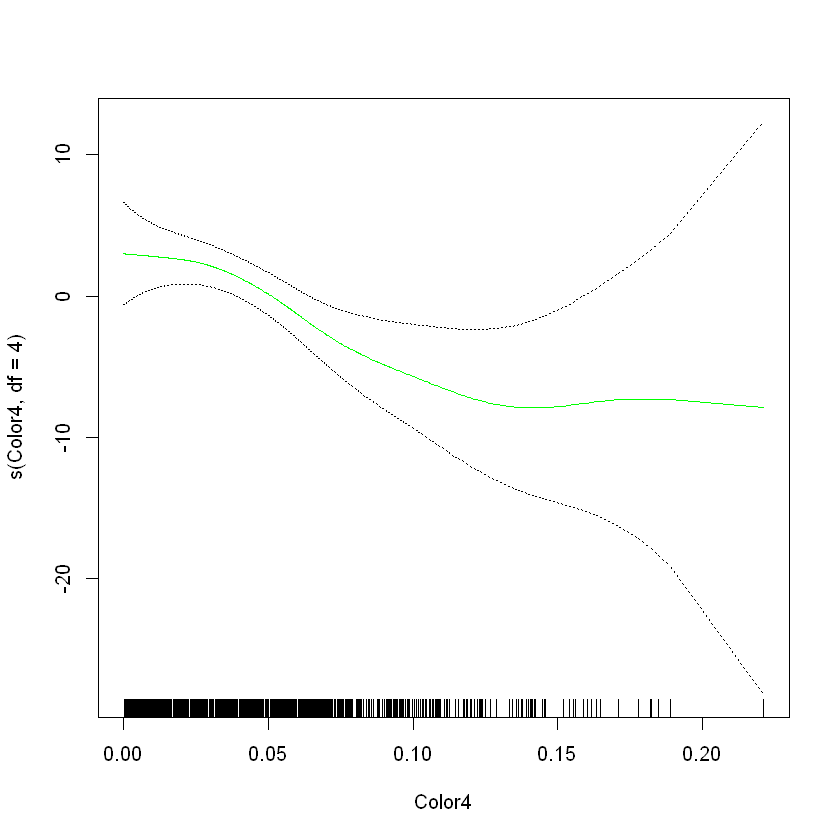

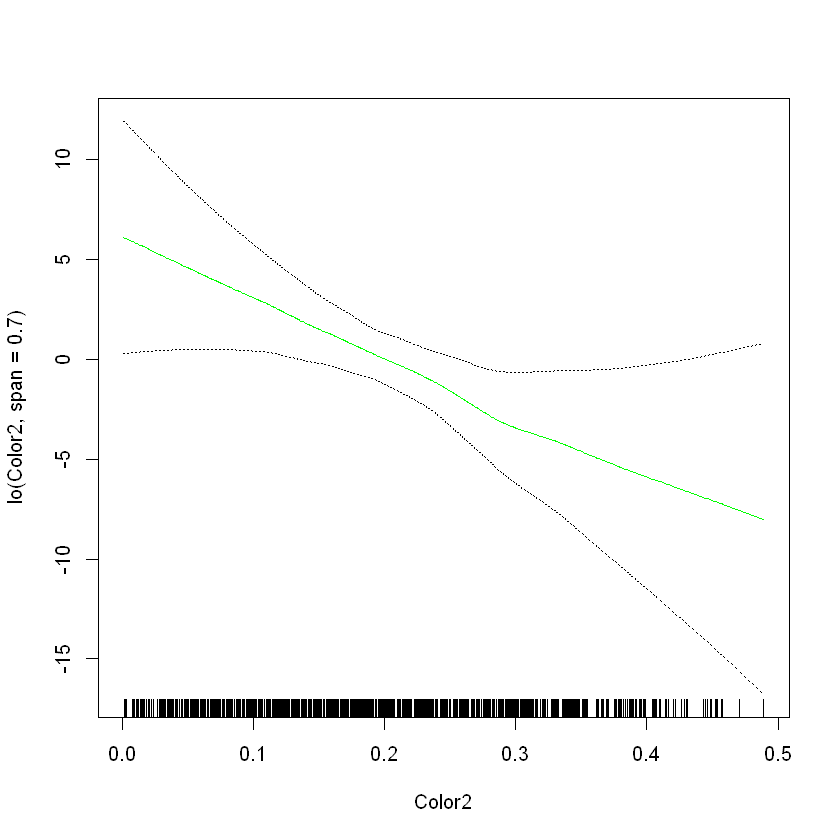

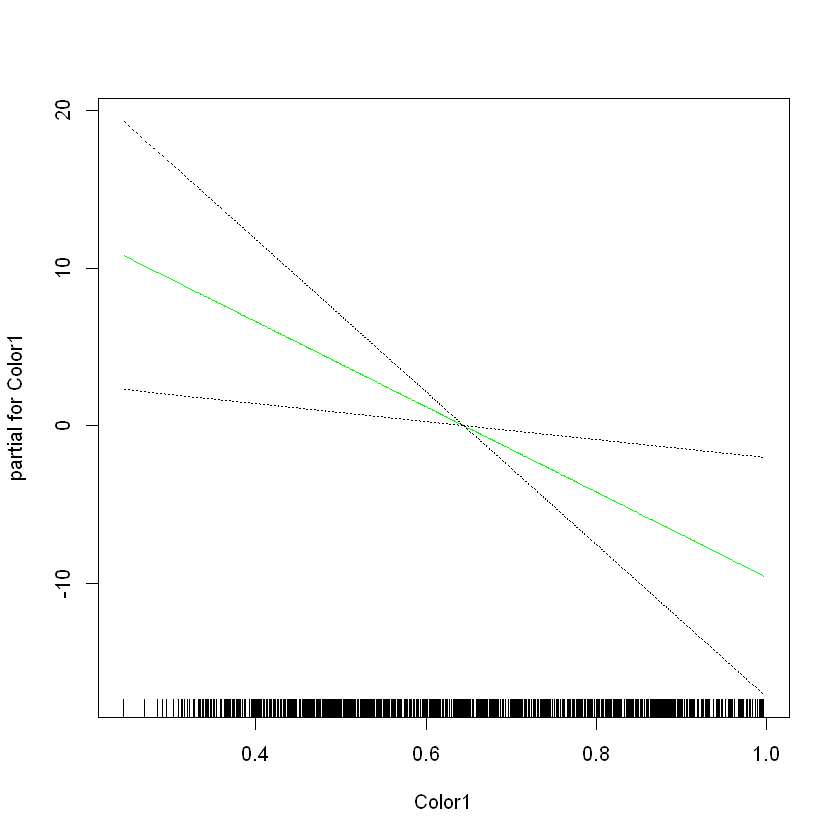

In [33]:
preds=predict(gam.m3,newdata =domcolor)
gam.lo=gam(Likes∼s(Color4,df=4)+lo(Color2,span=0.7)+Color1, data=domcolor) 
plot(gam.lo, se=TRUE , col="green") 

Warning message:
"package 'akima' was built under R version 3.4.4"

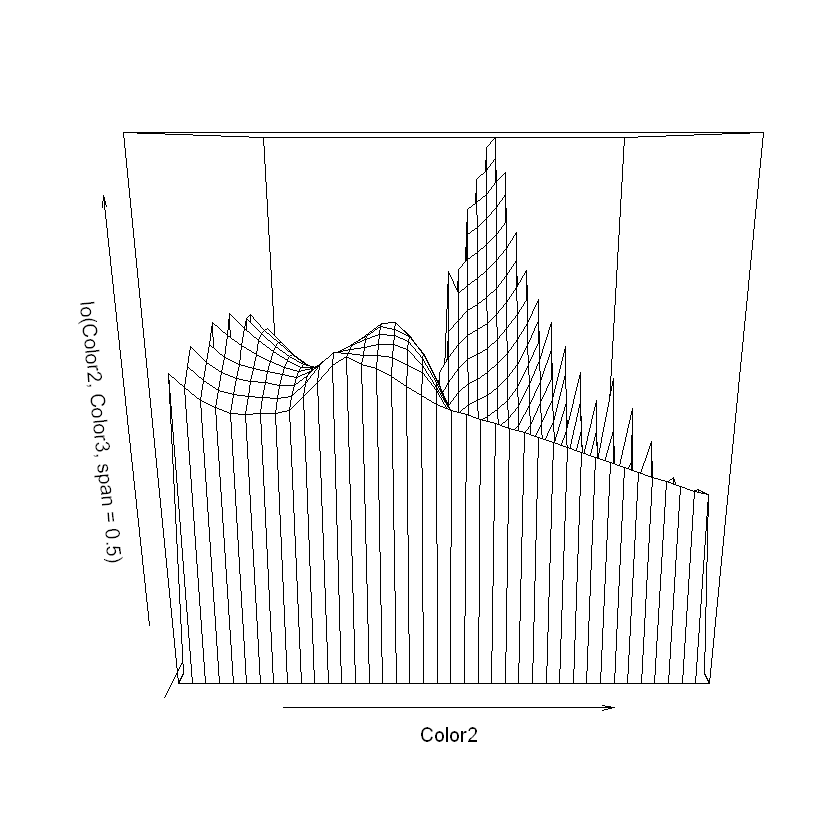

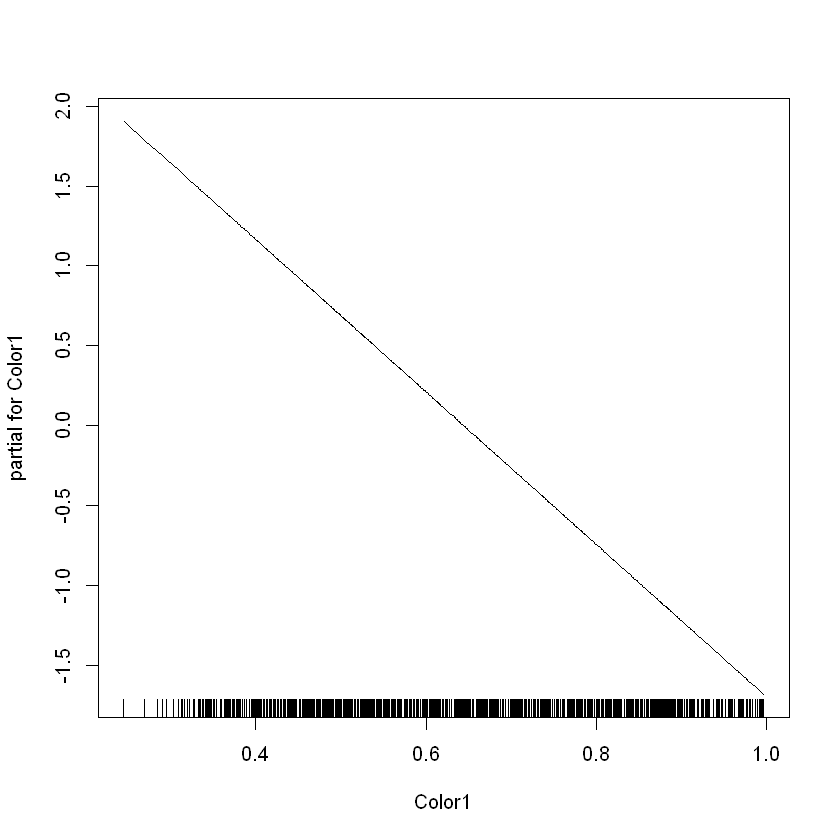

In [34]:
library (akima) 
gam.lo.i=gam(Likes∼lo(Color2,Color3,span=0.5)+Color1, data=domcolor) 
plot(gam.lo.i)

In [35]:
library (ROCR)
rocplot =function (pred , truth , ...){
    predob = prediction (pred , truth )
    perf = performance (predob , "tpr ", "fpr ")
    plot(perf ,...)}

Warning message:
"package 'pROC' was built under R version 3.4.4"Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var

Warning message in roc.default(response, m[[predictors]], ...):
"'response' has more than two levels. Consider setting 'levels' explicitly or using 'multiclass.roc' instead"

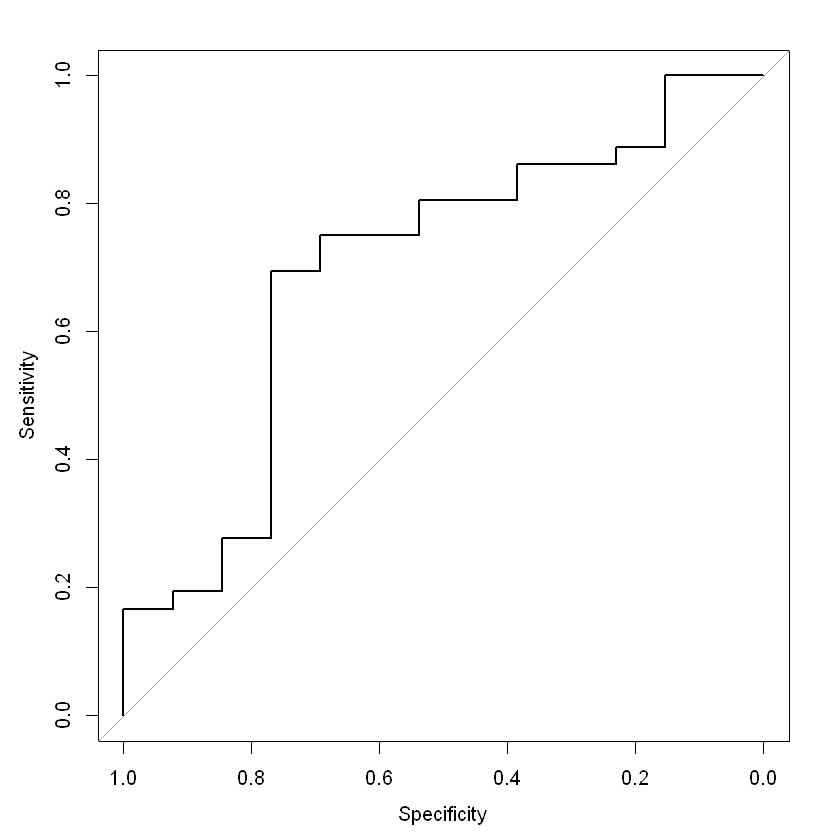

In [56]:
prob = predict(glm.fit, type=c("response"))
domcolor-> domcolor1 
domcolor1$prob = prob
library(pROC)
g = roc(Likes ~ prob, data=domcolor)
plot(g)

Warning message in roc.default(response, m[[predictors]], ...):
"'response' has more than two levels. Consider setting 'levels' explicitly or using 'multiclass.roc' instead"

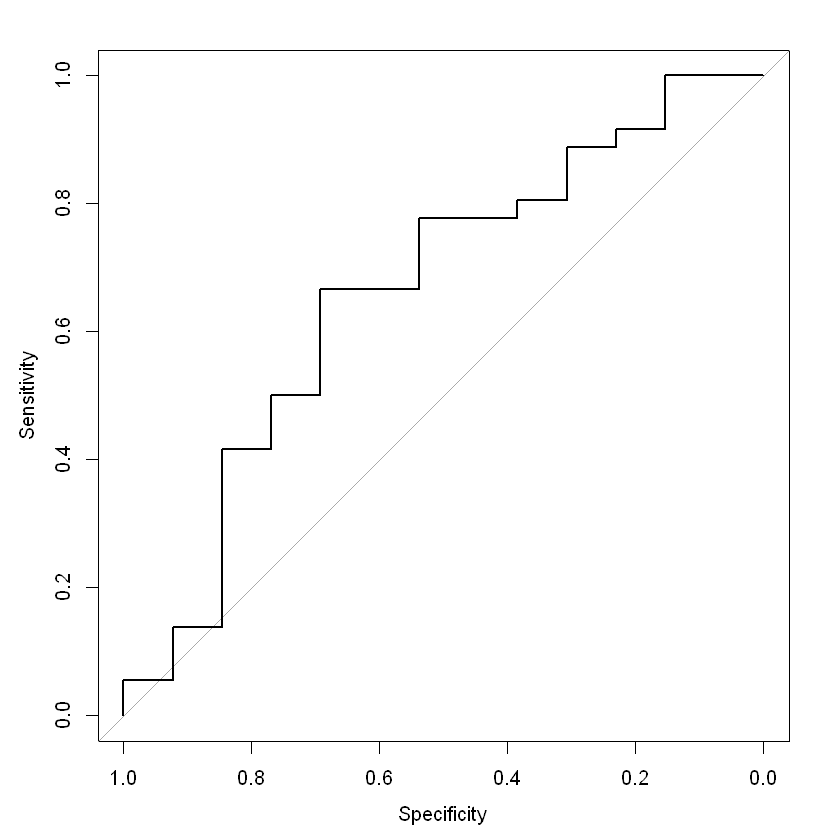

In [60]:
lmreg = lm(Likes~Color1+I(Color2^2)+I(Color3^3)+I(Color4^4)+I(Color5^5)+I(Color6^6)+I(Color7^7)+I(Color8^8),
           data=domcolor)
prob = predict(lmreg, type=c("response"))
domcolor-> domcolor1 
domcolor1$prob = prob
library(pROC)
g = roc(Likes ~ prob, data=domcolor)
plot(g)

In [57]:
#svmfit .opt=svm(y∼., data=dat[train ,], kernel =" radial ",gamma =2, cost=1, decision .values =T)
fitted=attributes(predict(glm.fit,domcolor[train ,], decision.values=TRUE))$decision.values

In [59]:
rocplot(fitted, domcolor[train,])

ERROR: Error in prediction(pred, truth): Format of predictions is invalid.


In [ ]:
fitted =attributes (predict (svmfit .flex ,dat[-train ,], decision .
values =T))$decision .values
> rocplot (fitted ,dat [-train ,"y"], add=T,col =" red ")